## HW13 图像处理初步
指导教师：胡俊峰

负责助教：朱成轩、李一飞

注意：仅需要提交.ipynb文件，请**不要**将下发压缩包中的其他文件一并交上。

截止时间：4月23日(周日) **中午**12:00

本次作业的总分为11分，达到10分即为满分，另外1分是附加分。如对本次作业有任何疑问，请在课程大群、技术问题交流群中提出或联系负责助教.

In [1]:
!pip install opencv-python matplotlib numpy seaborn

## 0. 请认真阅读代码，理解python opencv包的相关基本操作

### 0.0 读取图片（格式为numpy.ndarray）、图片数据的意义（长 \* 宽 \* RGB强度值）、显示图片、逐像素点操作

图片lena.jpg的数据类型为： <class 'numpy.ndarray'>
图片lena.jpg的形状为： (512, 512, 3)
图片lena.jpg的第一个像素点的值为： [0.88627451 0.5372549  0.49019608]

显示原始图片的第一个像素点


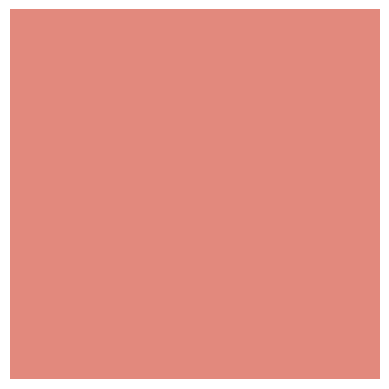

显示整张原始图片


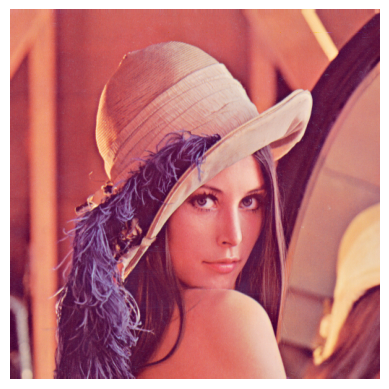

操作图片的内容（把一部分头发复制粘贴到另一个区域）


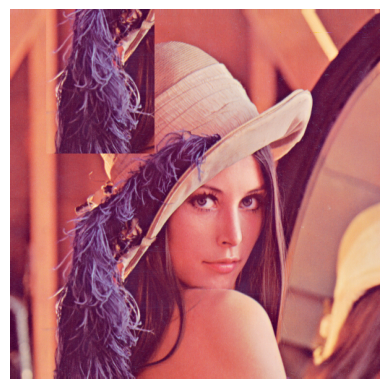

In [2]:
import matplotlib.pyplot as plt # plt 用于显示图片
import cv2
import numpy as np

# 读取图片
lena = cv2.imread('lena.jpg') # 读取和代码处于同一目录下的 lena.jpg
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) / 255.0 # 将BGR转换为RGB，并且将颜色数值从0-255转换为0-1

# 查看图片的类型和形状
print('图片lena.jpg的数据类型为：', type(lena))
print('图片lena.jpg的形状为：', lena.shape)
print('图片lena.jpg的第一个像素点的值为：', lena[0, 0, :])

# 显示第一个像素点
print("\n显示原始图片的第一个像素点")
plt.imshow(lena[0:1, 0:1, :])
plt.axis("off")
plt.show()

# 显示整张图片
print("显示整张原始图片")
plt.imshow(lena)
plt.axis("off")
plt.show()

# 操作图片的内容
print("操作图片的内容（把一部分头发复制粘贴到另一个区域）")
hair = lena[300:500, 50:200, :]
copy_lena = lena.copy()
copy_lena[0:200, 50:200, :] = hair
plt.imshow(copy_lena)
plt.axis("off")
plt.show()

### 0.1 对图片的简单像素操作

(512, 512)


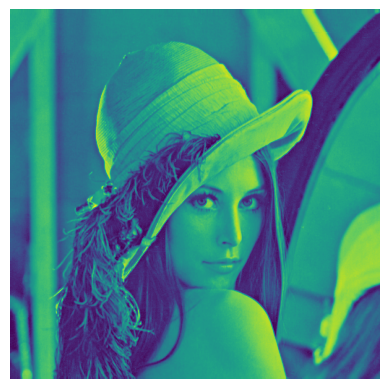

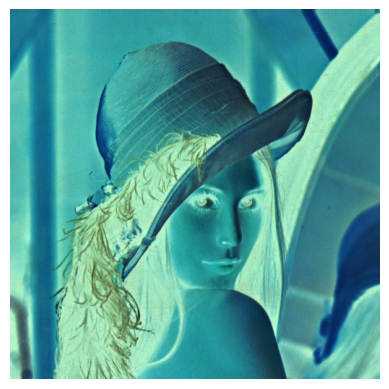

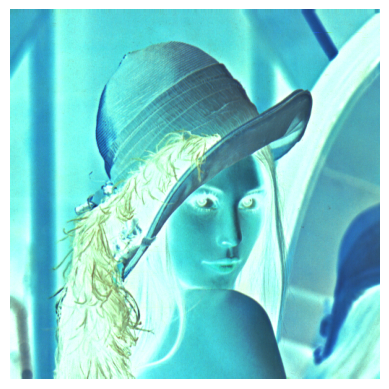

In [3]:
# 加载灰度图像
gray_lena = cv2.imread('lena.jpg', 0)  # 0表示加载灰度图像
print(gray_lena.shape)
plt.imshow(gray_lena)
plt.axis("off")
plt.show()

# 对图像取反
reverse_lena = 1 - lena
plt.imshow(reverse_lena)
plt.axis("off")
plt.show()

# 对图像像素做线性变换
new_lena = np.zeros_like(reverse_lena)
for i in range(reverse_lena.shape[0]):
    for j in range(reverse_lena.shape[1]):
        new_lena[i, j] = reverse_lena[i, j] * 1.2 + 0.1
new_lena = np.where(new_lena > 1.0, 1.0, new_lena)
plt.imshow(new_lena)
plt.axis("off")
plt.show()

### 0.2 对图像设定颜色阈值

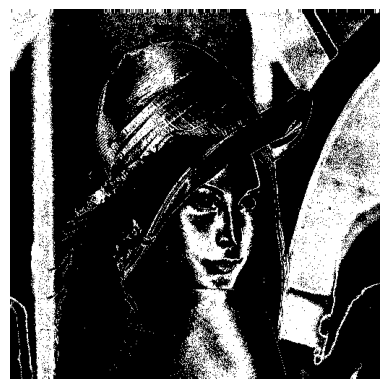

In [4]:
# 通过cv2.inRange()函数对图像设定颜色阈值
lena = cv2.imread('lena.jpg') # 读取和代码处于同一目录下的 lena.jpg
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])
threshold_lena = cv2.inRange(lena, lower_blue, upper_blue)
plt.imshow(threshold_lena,'gray')
plt.axis("off")
plt.show()

### 0.3  使用Canny算法进行图像边缘检测

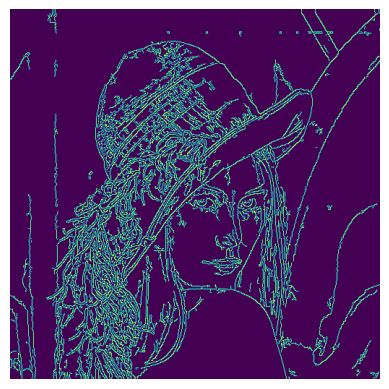

In [5]:
import matplotlib.pyplot as plt # plt 用于显示图片
import cv2
import numpy as np
lena = cv2.imread('lena.jpg') # 读取和代码处于同一目录下的 lena.jpg
canny_image = cv2.Canny(lena, 50, 150)
plt.imshow(canny_image)
plt.axis("off")
plt.show()

### 0.4 numpy实现高斯模糊

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def func_1(img, kernel):
    h, w = img.shape
    hk, wk = kernel.shape
    i0,j0 = np.meshgrid(range(hk),range(wk),indexing='ij')
    i1,j1 = np.meshgrid(range(h-hk+1),range(w-wk+1),indexing='ij')
    i = i0.reshape(-1,1)+i1.reshape(1,-1)
    j = j0.reshape(-1,1)+j1.reshape(1,-1)
    select_img = img[i,j] # (hk*wk, h*w)
    weights = kernel.reshape(1,-1) # (1,hk*wk)
    output = weights @ select_img
    output = output.reshape(h-hk+1,w-wk+1)
    return output

def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    kern_1d = np.exp(-0.5 * (ax**2) / (sig**2))
    kernel = np.outer(kern_1d, kern_1d)
    return kernel / np.sum(kernel)

img = cv2.imread('lena.jpg', 0) / 255.0
kern = gkern(9,5)
img_processed = func_1(img, kern)

plt.subplot(121)
plt.title('before')
plt.axis("off")
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.title('after')
plt.axis("off")
plt.imshow(img_processed,cmap='gray')
plt.show()

### 0.5 膨胀操作
图像膨胀的一般步骤:

1. 创建一个像素块(像素块可为任意形状，一般为矩形。自带一个核心，也叫做锚点,一般位于矩阵中央)
2. 将像素块中的核心像素依次置于图像每个像素点(遍历图像所有像素)。
3. 将像素块下所覆盖的所有像素的最大值赋给核心像素。

可以通过cv2.dilate()函数实现图像的膨胀操作。下面例子展示了使用一个5\*5的卷积核对图片进行膨胀操作的例子。

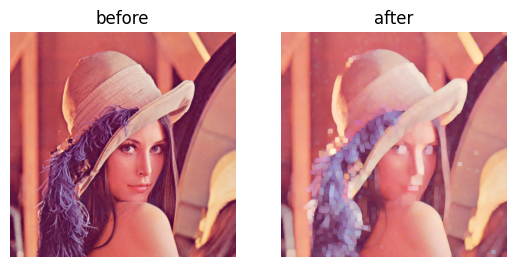

In [7]:
lena = cv2.imread('lena.jpg') # 读取和代码处于同一目录下的 lena.jpg
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB) / 255.0 # 将BGR转换为RGB，并且将颜色数值从0-255转换为0-1
plt.subplot(121)
plt.title('before')
plt.imshow(lena)
plt.axis("off")

kernel = np.ones((9, 9), dtype=np.uint8)
dilate_lena = cv2.dilate(lena, kernel, 50) # 1:迭代次数，也就是执行几次膨胀操作
plt.subplot(122)
plt.title('after')
plt.imshow(dilate_lena)
plt.axis("off")
plt.show()

## 1. 基于opencv的基本操作

在opencv中有许多常用的图像处理的函数cv2.Sobel(), cv2.Laplacian(), cv2.GaussianBlur()等，可以参见[官方文档](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html)进一步学习。

在这一章中，希望您可以学习到opencv的一些基本操作以及背后的原理。

### 1.1 模糊、锐化（1.5分）
1. 请用以下两种方式实现对图像的高斯模糊操作，默认模糊核尺寸$k_X=k_Y=15$, 标准差$\sigma_X=\sigma_Y=5$.

    - 直接使用cv2.GaussianBlur()；

    - 用cv2.getGaussianKernel()和cv2.filter2D()组合完成（注意cv2.filter2D的参数）

2. 请用sharpened = original + (original − blurred) * amount进行锐化操作，其中blurred为按默认参数做高斯模糊的结果，amount默认为0.6。注：这一操作被称为USM([Unsharp Masking](https://en.wikipedia.org/wiki/Unsharp_masking))。

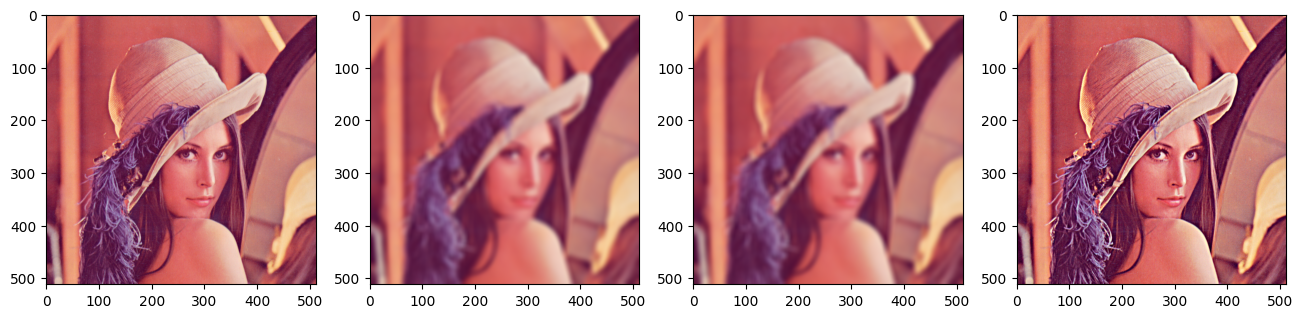

In [10]:
def blur_cv2(image,ksize=15,sigma=5):
    # TODO
    return np.clip(cv2.GaussianBlur(src=image, ksize=(ksize, ksize), sigmaX=sigma), 0, 1)

def blur_custom(image,ksize=15,sigma=5):
    # TODO
    kernel = cv2.getGaussianKernel(ksize=ksize, sigma=sigma)
    kernel = kernel @ kernel.T
    return np.clip(cv2.filter2D(src=image, ddepth=-1, kernel=kernel), 0, 1)

def USM(image, amount=.6):
    # TODO
    blurred = blur_cv2(image)
    return np.clip(image + (image-blurred) * amount, 0, 1)

plt.figure(figsize=(16,4))
plt.subplot(141)
plt.imshow(USM(lena,0))
plt.subplot(142)
plt.imshow(blur_cv2(lena,15,5))
plt.subplot(143)
plt.imshow(blur_custom(lena,15,5))
assert np.allclose(blur_cv2(lena,15,5),blur_custom(lena,15,5))
plt.subplot(144)
plt.imshow(USM(lena,0.6))
plt.show()

### 1.2 梯度相关的算子（2.5分）
Sobel算子常用于获得图像的一阶梯度，形式上图像$I$关于$x$和$y$的一阶梯度分别可以用下式中的$G_x$和$G_y$来近似（这里以$k=3$的Sobel算子为例），对应cv2.Sobel()：
$$
G_x = \left[\begin{matrix}-1 & 0 & 1\\-2 & 0 & 2 \\ -1 & 0 & 1\end{matrix}\right] \ast I,\quad
G_y = \left[\begin{matrix}1 & 2 & 1\\0 & 0 & 0 \\ -1 & -2 & -1\end{matrix}\right] \ast I,
$$
其中$\ast$表示卷积运算（为简化描述，之后我们仅描述卷积核，忽略卷积图像的部分）。

细心的同学可能会发现，应用Sobel算子的结果理应是近似一阶梯度的若干倍，但由于我们一般仅关注梯度绝对值的*相对大小*，这里可以忽略这个倍数的关系。

Laplacian算子被定义为$\Delta I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$，我们一般可以用以下两种核去卷积图像得到近似的结果，对应cv2.Laplacian()：
$$
\left[\begin{matrix}0 & -1 & 0\\-1 & 4 & -1 \\ 0 & -1 & 0\end{matrix}\right], \quad \left[\begin{matrix}-1 & -1 & -1\\-1 & 8 & -1 \\ -1 & -1 & -1\end{matrix}\right]
$$

Hessian算子通过求$\det\left(\left[\begin{matrix} I_{xx} & I_{xy}\\I_{xy} & I_{yy} \end{matrix}\right] \right)$来检测极值点，课件上已有详细介绍，这里不再展开。

请用**除了opencv中直接实现的函数以外的方法**，例如用cv2.filter2D()、numpy中的函数等实现以下功能（?分）
- $k=3$的Sobel算子
- Laplacian算子（其中Laplacian算子选用第一种卷积核）
- （逐像素地）求Hessian矩阵的行列式值（基于$k=3$的Sobel算子）
- 根据$\frac{\partial I}{\partial x}$和$\frac{\partial I}{\partial y}$（基于$k=3$的Sobel算子）求梯度方向和梯度强度（求L2 norm，不用课件里的近似）

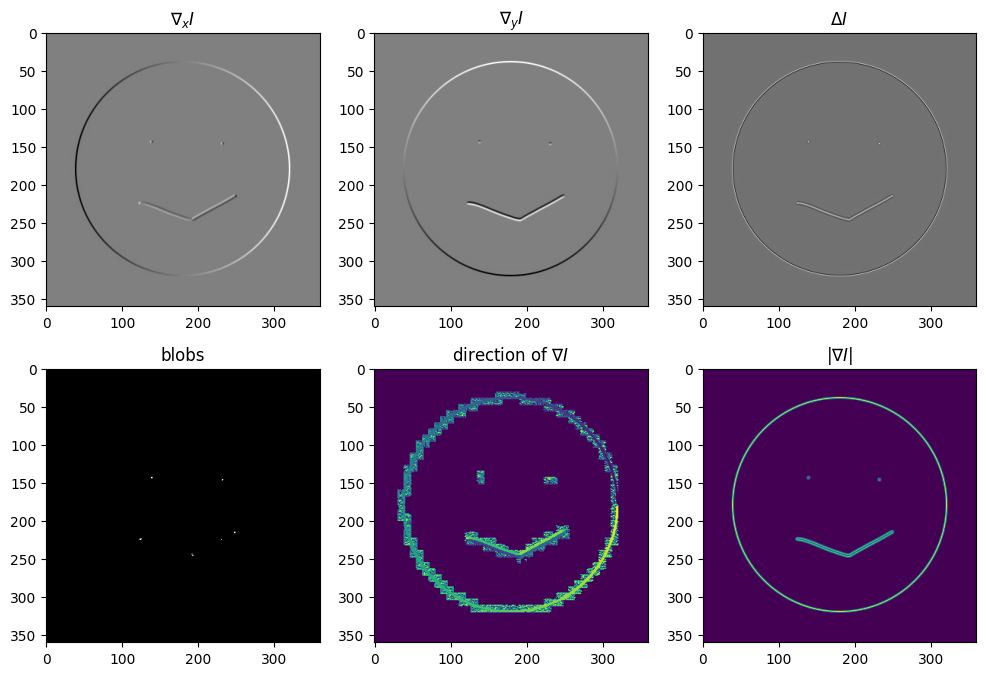

In [11]:
def sobel_x(image):
    # TODO
    sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return cv2.filter2D(src=image, ddepth=-1, kernel=sobel_x_kernel)

def sobel_y(image):
    # TODO
    sobel_y_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return cv2.filter2D(src=image, ddepth=-1, kernel=sobel_y_kernel)

def laplacian(image):
    # TODO
    laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    return cv2.filter2D(src=image, ddepth=-1, kernel=laplacian_kernel)

def phase_magnitude(grad_x, grad_y):
    # TODO
    gradient_mag = np.sqrt(grad_x ** 2 + grad_y ** 2)
    gradient_phase = np.arctan2(grad_y, grad_x) * 180 / np.pi
    gradient_phase[gradient_phase < 0] += 360
    return gradient_phase, gradient_mag

def det_hessian(image):
    # TODO
    Ix = sobel_x(image)
    Iy = sobel_y(image)
    Ixx = sobel_x(Ix)
    Iyy = sobel_y(Iy)
    Ixy = sobel_x(Iy)
    return (Ixx * Iyy - Ixy * Ixy)

# Do not modify the codes below!
test_x = np.linspace(0,np.pi*2,30)
l1 = 1+np.abs(np.random.randn(30))
res = phase_magnitude(np.cos(test_x)*l1, l1*np.sin(test_x))
assert np.allclose(res[0], np.degrees(test_x),atol=1e-2)
assert np.allclose(res[1], l1)
circle = cv2.imread('circle.jpg',0)/255.
hess = det_hessian(circle)
hess -= hess.min()
blobs = np.where(hess<hess.max()*0.3,0,1)
grad_x = sobel_x(circle)
grad_y = sobel_y(circle)
gradient_phase, gradient_mag = phase_magnitude(grad_x, grad_y)
plt.figure(figsize=(12,8))
plt.subplot(231);plt.title(r'$\nabla_x I$')
plt.imshow(sobel_x(circle),'gray')
plt.subplot(232);plt.title(r'$\nabla_y I$')
plt.imshow(sobel_y(circle),'gray')
plt.subplot(233);plt.title(r'$\Delta I$')
plt.imshow(laplacian(circle),'gray')
plt.subplot(234);plt.title(r'blobs')
plt.imshow(blobs,'gray')
plt.subplot(235);plt.title(r'direction of $\nabla I$')
plt.imshow(gradient_phase)
plt.subplot(236);plt.title(r'$|\nabla I|$')
plt.imshow(gradient_mag)
plt.show()

### 1.3 常见噪声（1分）
为便于介绍，本节采用$X$表示原图，$Y$表示加了噪声后的图片。
1. 实现加性高斯白噪声(Additive white Gaussian noise, AWGN)，对于每个pixel $X_i$，有$Y_i = X_i + Z_i$，其中$Z_i\sim\mathcal{N}(0,\sigma^2)$
2. 实现泊松噪声，$P(\tilde{Y}_i = k) = \frac{1}{k!}e^{-\tilde{X}_i} \tilde{X}_i^k$，即每个$\tilde{Y}_i$均为$\lambda=\tilde{X}_i$的Poisson分布，其中$k\in\mathbb{N}$，$\tilde{X}_i=X_i * \text{scale}$，$Y_i=\tilde{Y}_i / \text{scale}$。

实现过程中，可以假定本题中图像均为取值在$[0,1]$的、float类型的np.ndarray。注：本题出现warning会被扣分。

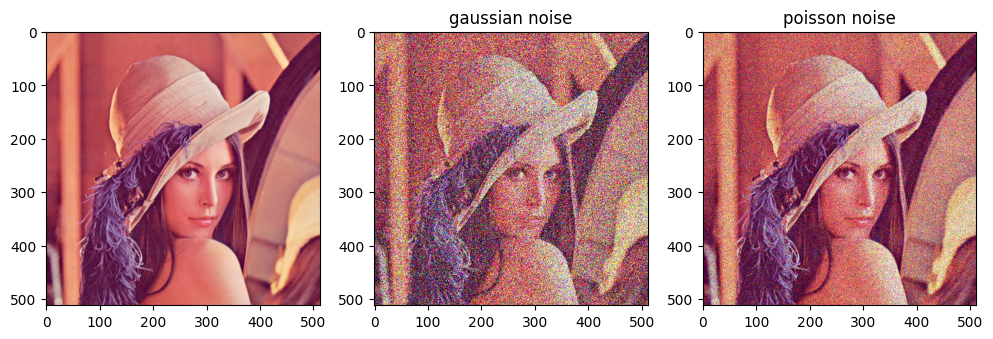

In [12]:
np.random.seed(42)
def gaussian_noise(img, sigma):
    # TODO
    noise = np.random.normal(size=img.shape, scale=sigma) 
    return np.clip(img+noise, 0, 1)

def poisson_noise(img, scale):
    # TODO
    noise = np.random.poisson(lam=img * scale, size=img.shape) / scale
    return np.clip(noise, 0, 1)

assert np.allclose(np.load('lena_gaussian.npy'),gaussian_noise(lena,0.3))
assert np.allclose(np.load('lena_poisson.npy'),poisson_noise(lena,255))

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(lena)
plt.subplot(132)
plt.title('gaussian noise')
plt.imshow(gaussian_noise(lena,0.4))
plt.subplot(133)
plt.title('poisson noise')
plt.imshow(poisson_noise(lena,16))
plt.show()

### 1.4 HOG（3分）
接下来，您将要完成一个方向梯度直方图(Histogram of Oriented Gradients, HOG)特征提取的流程。这是发表于CVPR'05的[Histograms of Oriented Gradients for Human Detection](http://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf)中提出的descriptor，感兴趣可以进一步阅读原论文。

我们假设输入的图片已经是灰度化、gamma校正（可选）后的结果。这里提供的render_gradient函数是一个根据每个cell的gradient进行简单可视化的操作，您可以在实现过程中用于debug。

In [13]:
import cv2
import numpy as np
# 设置超参数
cell_size = 4 # cell的长宽(这里的超参数单位均为像素)
block_stride = 4 # block滑窗的stride 
bin_size = 12 # 将0~360°分成bin_size个bin，用于统计直方图
block_size = 12
winsize = (64,128)
# 灰度化、gamma校正(optional)
assert block_stride % cell_size == 0
img = cv2.resize(cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE), winsize, interpolation=cv2.INTER_LANCZOS4)/255.#**(1/2)
plt.imshow(img, 'gray')

def render_gradient(cell_gradient, angle_unit):
    # 用于可视化的函数，无需更改
    plt.figure(figsize=(8,8))
    zoom_in = 5
    image = np.zeros((cell_gradient.shape[0] * cell_size * zoom_in, cell_gradient.shape[1] * cell_size * zoom_in))
    cell_width = cell_size / 2
    cell_gradient /= max(np.max(cell_gradient),1e-10) # normalize
    for i in range(1,cell_gradient.shape[0]):
        for j in range(1,cell_gradient.shape[1]):
            angle = 0
            for magnitude in cell_gradient[i][j]:
                angle_radian = np.radians(angle)
                i1 = int((i+.5) * cell_size + magnitude * cell_width * np.sin(angle_radian))
                j1 = int((j+.5) * cell_size + magnitude * cell_width * np.cos(angle_radian))
                i2 = int((i+.5) * cell_size - magnitude * cell_width * np.sin(angle_radian))
                j2 = int((j+.5) * cell_size - magnitude * cell_width * np.cos(angle_radian))
                cv2.line(image, (zoom_in * j1, zoom_in * i1), (zoom_in * j2, zoom_in * i2), int(255 * magnitude),2)
                angle += angle_unit

    plt.imshow(image,'gray')
    plt.show()
    return

首先，您需要从输入图像中通过滑窗的方式得到若干个window_size（一般取$64\times 128$像素），滑窗的大小和步长通过winsize和win_stride来定义。这一节中，您将聚焦于每个window中计算HOG descriptor的方式——最终将不同window的HOG descriptor拼接起来是比较trivial的，这里不再描述。**为方便您学习，不妨取一个$64\times 128$的图片进行实验。**

接下来，您要将局部特征从cell组成block。每个block中，将cell的descriptor展平后拼接起来作为block的descriptor，并做L2-Hys归一化。这里的L2-Hys归一化是指先做L2 norm的归一化后，将最大值限定在一个threshold内，再做一次L2 norm的归一化。L2 norm的归一化可以写作：
$$
\tilde{v} = \frac{v}{\sqrt{\Vert v\Vert_2^2+\epsilon^2}}
$$
其中$\tilde{v}$是$v$做L2 norm归一化的结果，$\epsilon$是为防止除0而设置的小量（这里可取1e-6）。

注：您这里需要做的是L2-Hys归一化，默认threshold=0.2；归一化的是block中的cell_per_block $\times$ cell_per_block个cell的descriptor拼接起来的向量。

cell组成block的过程类似于滑窗，通过block_stride参数控制。block_stride==cell_size的情况如下图所示：

<img src="hog_illu.jpg" style="zoom:33%;" />

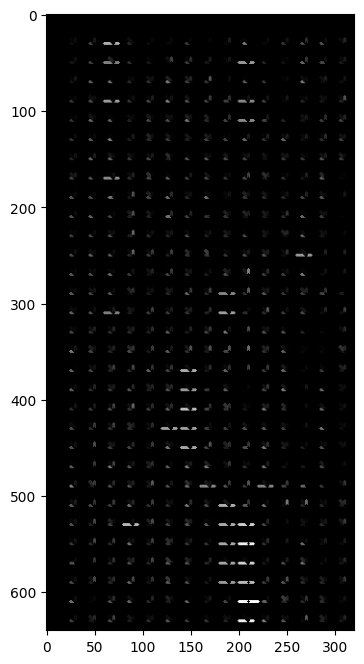

In [14]:
class HOGDescriptorCustom:
    def __init__(self, winsize: tuple, block_size:int, block_stride:int, cell_size:int, bin_size:int):
        self.winsize = winsize
        self.block_size = block_size
        self.block_stride = block_stride
        self.cell_size = cell_size
        self.bin_size = bin_size
        self.angle_unit = 360. / self.bin_size # signed gradients
    def __call__(self, img, debug=False):
        height, width = img.shape
        assert self.winsize == (width,height) # For simplicity, assuming there is only one window in the image.
        cell_per_block = self.block_size // self.cell_size
        # 使用ksize=1的sobel算子计算梯度(0.5')，并计算梯度强度gradient magnitude和梯度的角度（使用角度制）(0.5')
        # TODO
        gradient_magnitude, gradient_angle = None, None
        grad_x = cv2.Sobel(src=img, ddepth=-1, dx=1, dy=0, ksize=1)
        grad_y = cv2.Sobel(src=img, ddepth=-1, dx=0, dy=1, ksize=1)
        gradient_angle, gradient_magnitude = phase_magnitude(grad_x, grad_y)

        # 每个小cell中，根据gradient magnitude加权，统计对应区域的gradient angle的直方图
        # 每个像素的gradient angle只会将它的magnitude线性加权影响最近的两个bin (1')
        # TODO
        cell_gradient_vector = np.zeros((int(height / self.cell_size), int(width / self.cell_size), self.bin_size))
        unit_loc = (gradient_angle / self.angle_unit).astype(int)
        pixel_grad_vector = np.zeros((height, width, self.bin_size))
        for i in range(self.bin_size):
            pixel_grad_vector[:, :, i] += gradient_magnitude*(unit_loc==i)*(1-(gradient_angle/self.angle_unit-unit_loc))
            pixel_grad_vector[:, :, (i+1)%self.bin_size] += \
                gradient_magnitude*(unit_loc==i)*(gradient_angle/self.angle_unit-unit_loc)
        for i in range(0, height, self.cell_size):
            for j in range(0, width, self.cell_size):
                cell_gradient_vector[i//self.cell_size, j//self.cell_size, :] = \
                    pixel_grad_vector[i:i+self.cell_size, j:j+self.cell_size, :].sum(axis=(0, 1))

        if debug:
            render_gradient(cell_gradient_vector, self.angle_unit)
        hog_vector = []
        # 从每个cell的gradient vector聚集得到block的vector (1'), 请注意normalization
        # TODO
        cell_per_block = self.block_size // self.cell_size
        EPS = 1E-6
        threshold = 0.2
        for i in range(0, height-self.block_size+self.block_stride, self.block_stride):
            for j in range(0, width-self.block_size+self.block_stride, self.block_stride):
                x = i // self.cell_size
                y = j // self.cell_size
                block_vector = cell_gradient_vector[x:x+cell_per_block, y:y+cell_per_block, :].flatten()
                block_vector /= np.sqrt(np.linalg.norm(block_vector) ** 2 + EPS ** 2)
                block_vector = np.clip(block_vector, 0, threshold)
                block_vector /= np.sqrt(np.linalg.norm(block_vector) ** 2 + EPS ** 2)
                hog_vector.append(block_vector)
        hog_vector = np.concatenate(hog_vector)[:, np.newaxis]

        return hog_vector

hog_custom = HOGDescriptorCustom(winsize,block_size,block_stride,cell_size,bin_size)
hog_vector_custom = hog_custom(
    cv2.resize(cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE), winsize, interpolation=cv2.INTER_LANCZOS4),debug=True
)

您的实现可能与opencv的实现略有不同，结果存在差异是正常的，但对同一张图片提取的特征向量shape是一样的。调用时指定debug=True可以看到梯度在各方向上强度的示意图，并通过下一个代码块的assert来判断自己的实现正误。

In [15]:
hog_cv2 = cv2.HOGDescriptor(
    winsize,
    (block_size,block_size),
    (block_stride,block_stride),
    (cell_size,cell_size),
    _nbins=bin_size,
    _signedGradient = True
)
hog_vector_cv2=(hog_cv2.compute(
     cv2.resize(cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE), winsize, interpolation=cv2.INTER_LANCZOS4)
    ))

assert hog_vector_cv2.shape == hog_vector_custom.shape

## 3 图像分类

针对sklearn自带的人脸数据集的识别任务，利用HOG特征作为图像的特征描述符进行分类

提示：最终提取的特征描述符维度过大，需要考虑用PCA降维后再训练分类器

### 3.1 读取图像数据

In [16]:
import cv2
import numpy as np
import sklearn
from sklearn import datasets

faces = sklearn.datasets.fetch_olivetti_faces(download_if_missing=True)
imgs = faces.images
labels = faces.target

print(imgs.shape)
print(labels.shape)

(400, 64, 64)
(400,)


### 3.2 预处理（1.5分）
这一部分，您将完成训练数据的预处理。

1. 您需要使用刚刚实现的、用于提取HOG特征的类，对图像进行特征提取；您也可以用opencv提供的其它提取特征的算子，但在后者的情况下，您会失去0.5分。~~（我觉得这就是一种自信！）~~
2. 同时您也要知道，并不是把一大堆非常高维的数据扔给机器学习，机器就能在测试集上表现很好的，况且还会拖慢执行速度（这就是数据降维的重要性）。
3. 在分离训练数据与测试数据时，注意这里指定stratify=labels，保证训练和测试每一类都出现过。同时这里设置了test_size=0.5，可以看出用于训练的数据相对于测试数据还是比较少的。

In [17]:
import sklearn.model_selection
np.random.seed(42)
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(imgs,labels,test_size=0.5,stratify=labels)
# TODO
hog_custom = HOGDescriptorCustom((64,64),16,8,8,16)
ftrain = []
ftest = []
for i in xtrain:
    ftrain.append(hog_custom(i))
for i in xtest:
    ftest.append(hog_custom(i))
ftrain = np.concatenate(ftrain, axis=1).T
ftest = np.concatenate(ftest, axis=1).T
# TODO

### 3.3 分类（0.5分）

1. 使用[SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)或者opencv中的其它传统机器学习算法进行分类，将测试集的分类结果存入test_result中
2. 得到混淆矩阵([confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html))，并用[seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)进行展示，如结果图
3. 计算Precision、Recall和F1-score的代码已完成，有兴趣的同学可以[进一步](https://en.wikipedia.org/wiki/Precision_and_recall)了解这三个指标的含义。

注1：您把指标刷到1.000也不会因此有加分^_^，把时间留给期中吧！

注2：作为参考，在这个任务（一半数据用于测试）一般三个指标都在0.9以上算“正常水平”。

Precision: 0.950, Recall: 0.950, F1-score: 0.927


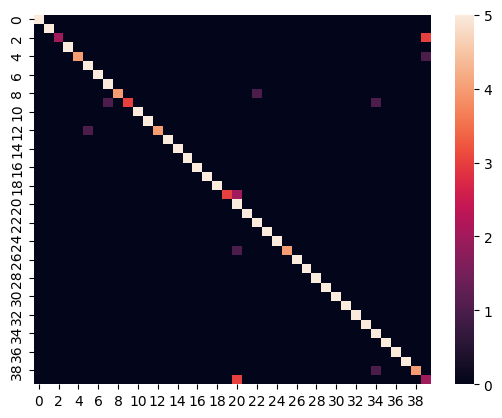

In [18]:
import sklearn.metrics
import seaborn as sn
# TODO
from sklearn import svm
test_result = None
model = svm.SVC()
model.fit(ftrain, ytrain)
test_result = model.predict(ftest)
confusion_matrix = sklearn.metrics.confusion_matrix(ytest, test_result)
sn.heatmap(confusion_matrix)
# Do not modify the codes below!
precision, recall, fscore, _ = sklearn.metrics.precision_recall_fscore_support(ytest,test_result,average='macro')
print(f"Precision: {precision:.3f}, Recall: {precision:.3f}, F1-score: {fscore:.3f}")

### 3.4 攻击和对抗（1分）
设计一个合理的变换，使得人眼观感差别不大的情况下（至少可以轻松识别分类）对刚刚的分类算法产生明显的负面影响。（0.5分）

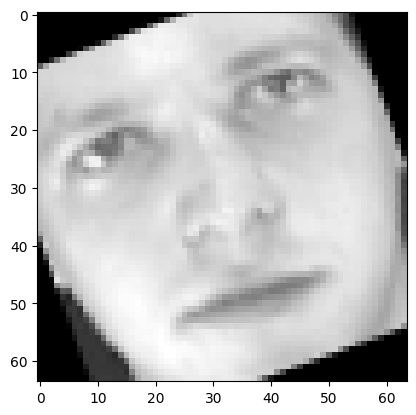

Precision: 0.130, Recall: 0.130, F1-score: 0.097


e:\Anaconda3\envs\gomoku\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


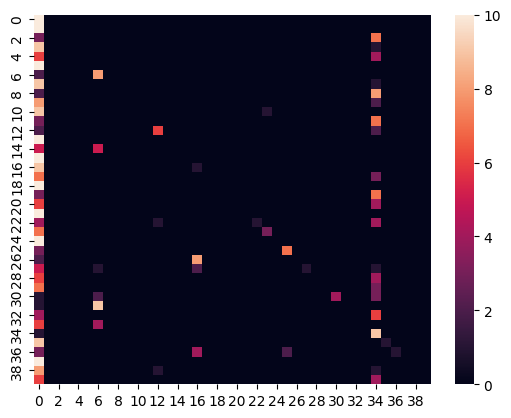

In [20]:
# TODO
# Tips: Do not train a new classifier here.
_, rows, cols = imgs.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),20,1)
fimgs = []
for i in imgs:
    fimgs.append(hog_custom(cv2.warpAffine(i, M, (rows, cols))))
plt.imshow(imgs[0],'gray')
plt.show()
plt.imshow(cv2.warpAffine(imgs[0], M, (rows, cols)), 'gray')
plt.show()
fimgs = np.concatenate(fimgs, axis=1).T
res = None
res = model.predict(fimgs)
confusion_matrix = sklearn.metrics.confusion_matrix(labels, res)
sn.heatmap(confusion_matrix)
# Do not modify the codes below!
precision, recall, fscore, _ = sklearn.metrics.precision_recall_fscore_support(res,labels,average='macro')
print(f"Precision: {precision:.3f}, Recall: {precision:.3f}, F1-score: {fscore:.3f}")

留一个问题作思考：您认为这里的攻击为何有效？有何方法可以对抗这种攻击？（0.5分）

您可以用markdown在这里写下您的答案，也可以在下面继续进行一些实验来验证你的想法。

**有效原因：** 图像旋转超过HOG设置的angle_unit时，将会使提取到的HOG特征分布平移，从而在分类时学习到的权重与特征不匹配。

**对抗攻击：** 使用具有旋转不变性的特征提取器。